# Basic feature interrelation analysis of COCONUT dataset using the 'fip3' library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import csv
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

In [6]:
DATASET_NAME = 'COCONUT'
OUTPUT_FIGURE_PATH = '../images/COCONUT'

FEATURES_NAME = 'ECFP1-like substructures'


HYBRID_FEATURES_NAME = FEATURES_NAME + " and COCONUT activities"

REFERENCE_DATASET_NAME = 'COCONUT_DM'


## Loading an interrelation profile
From interrelation files already preprocessed by scripts in fip3/scripts

In [3]:
p = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
p.df

value
feature1 feature2       
0        0          3426
         1          1169
         10          153
         100          51
         1000         46
...                  ...
997      998           7
         999          18
998      998        3208
         999          96
999      999        7175

[2096060 rows x 1 columns]

## General characterization of a co-occurrence profile

In [4]:
print(f"There are {len(p.distinct_features())} distinct {FEATURES_NAME} within {DATASET_NAME}.")

There are 2048 distinct ECFP1-like substructures within COCONUT.


In [5]:
self_relations_values = p.select_self_relations()['value']
self_relations_values

feature1  feature2
0         0             3426
1         1           126721
10        10            7859
100       100           2684
1000      1000          3176
                       ...  
995       995            964
996       996           5560
997       997           3556
998       998           3208
999       999           7175
Name: value, Length: 2048, dtype: int64

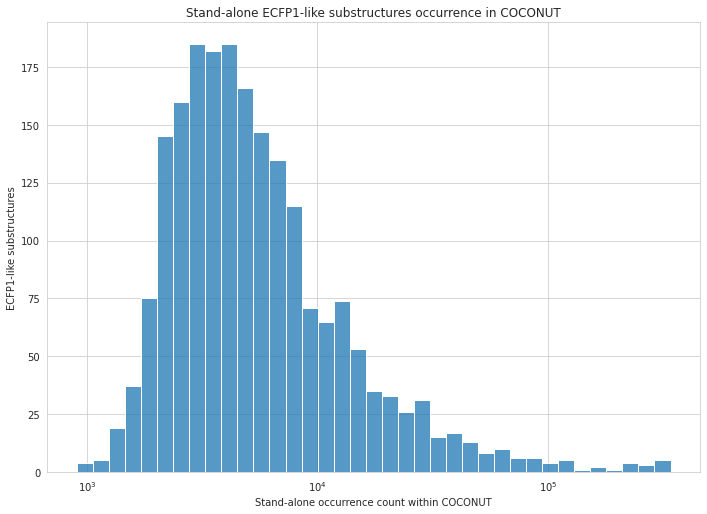

In [6]:
title = f"Stand-alone {FEATURES_NAME} occurrence in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within {DATASET_NAME}", ylabel=f"{FEATURES_NAME}")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [7]:
cooccurrence_values = p.select_raw_interrelations()['value']
cooccurrence_values

feature1  feature2
0         1           1169
          10           153
          100           51
          1000          46
          1001          21
                      ... 
996       998           63
          999           53
997       998            7
          999           18
998       999           96
Name: value, Length: 2094012, dtype: int64

In [8]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for {FEATURES_NAME} within {DATASET_NAME}")

There is in total 21027472 feature stand-alone occurrences and 657482445 feature co-occurrences for ECFP1-like substructures within COCONUT


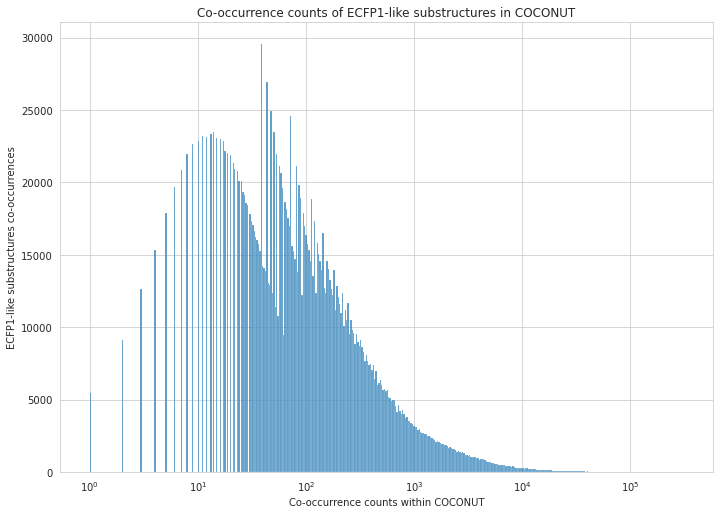

In [9]:
title = f"Co-occurrence counts of {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True)
ax.set(title=title, xlabel=f"Co-occurrence counts within {DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} co-occurrences")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [10]:
print(f"The maximum theoretical number of different feature interrelations of the observed {FEATURES_NAME} \
within {DATASET_NAME} would be {int(p.num_max_interrelations())}, whereas the number of actual observed \
interrelations is only {p.num_raw_interrelations()}. Therefore, the interrelation matrix population ratio is \
approx. {p.num_raw_interrelations() / p.num_max_interrelations():.4f}.")

The maximum theoretical number of different feature interrelations of the observed ECFP1-like substructures within COCONUT would be 2096128, whereas the number of actual observed interrelations is only 2094012. Therefore, the interrelation matrix population ratio is approx. 0.9990.


In [11]:
print(f"The mean co-occurrence value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean co-occurrence value for ECFP1-like substructures within COCONUT is 313.98, with the standard deviation of 1999.36. The mean stand-alone value is 10267.32, with the standard deviation of 24984.89.


## General characterization of pointwise mutual information profile

In [12]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p)
p

In [13]:
p.select_self_relations()['value']

feature1  feature2
0         0           0.008869
1         1           0.328040
10        10          0.020344
100       100         0.006948
1000      1000        0.008222
                        ...   
995       995         0.002495
996       996         0.014393
997       997         0.009205
998       998         0.008304
999       999         0.018574
Name: value, Length: 2048, dtype: float64

In [14]:
p.select_self_relations()['value'].min()

0.0023427569978539827

In [15]:
p.select_raw_interrelations()['value'].min()

2.5886817655845113e-06

In [16]:
p = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(p)

p

In [17]:
p.df

value
feature1 feature2          
0        0         0.000000
         1         0.056805
         10        1.134299
         100       1.099298
         1000      0.707608
...                     ...
997      998      -2.076792
         999      -1.875527
998      998       0.000000
         999       0.688092
999      999       0.000000

[2096060 rows x 1 columns]

In [18]:
pmi_values = p.select_raw_interrelations()['value']
pmi_values

feature1  feature2
0         1           0.056805
          10          1.134299
          100         1.099298
          1000        0.707608
          1001        0.233511
                        ...   
996       998         0.448303
          999        -0.962361
997       998        -2.076792
          999        -1.875527
998       999         0.688092
Name: value, Length: 2094012, dtype: float64

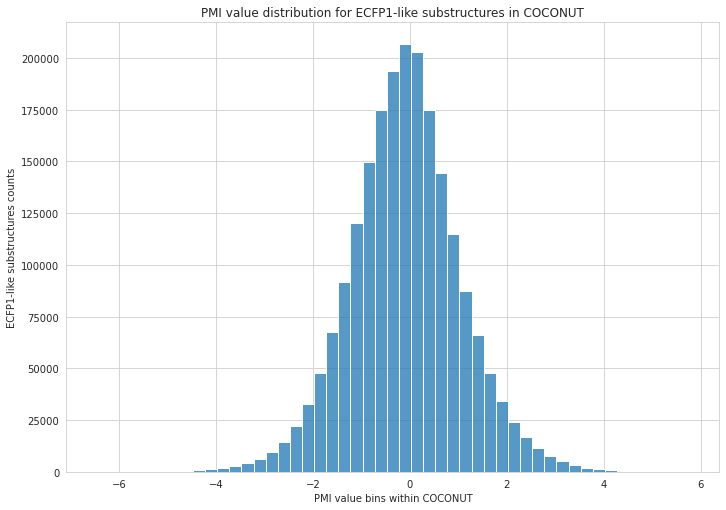

In [19]:
title = f"PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(pmi_values, binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [20]:
print(f"The mean PMI value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean PMI value for ECFP1-like substructures within COCONUT is -0.09, with the standard deviation of 1.13. The mean stand-alone value is 0.00, with the standard deviation of 0.00.


In [21]:
major_pmi_values = p.select_major_interrelations(2)['value']
major_pmi_values

feature1  feature2
0         1024        3.385425
          1058        4.270433
          1059        2.883002
          1067        2.320265
          1094       -4.203244
                        ...   
986       991        -4.004758
987       991        -2.564294
988       994         2.224146
989       991        -3.110025
990       998        -3.447857
Name: value, Length: 108879, dtype: float64

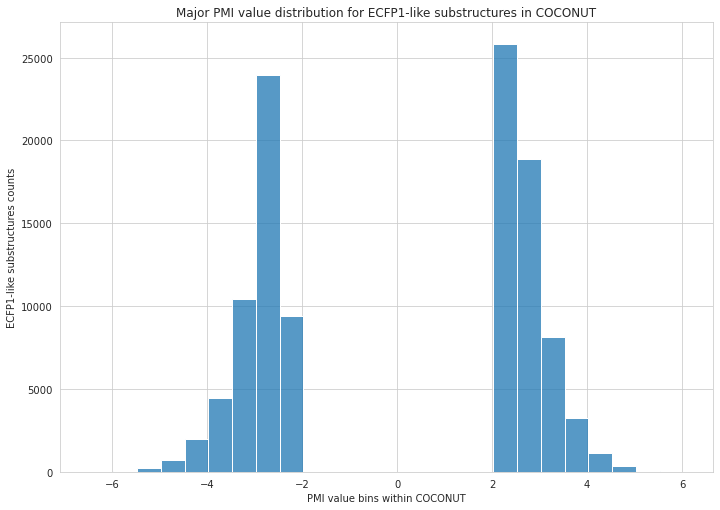

In [22]:
title = f"Major PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(major_pmi_values, binwidth=0.5)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [23]:
p.mean_raw_interrelation_value()

-0.0942984910316341

## General characterization of reference pointwise mutual information profile

In [ ]:
r = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    r, vector_count=REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT)
r.df

value
feature1 feature2          
CCN      CCN       0.499327
         CCO       0.163191
         COC       0.145833
         Cn        0.027918
         Cn(n)n    0.000510
...                     ...
CC(c)n   cSc       0.000302
         cc(o)S    0.000152
C=C(C)N  cc(-n)s   0.000053
CN=c     cc(-n)s   0.000058
N=c(n)s  cc(-n)s   0.000058

[38277 rows x 1 columns]

In [ ]:
r = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(r)
r.df

value
feature1 feature2          
CCN      CCN       0.000000
         CCO       0.139260
         COC       0.186709
         Cn        0.069478
         Cn(n)n   -0.508853
...                     ...
CC(c)n   cSc       2.488432
         cc(o)S    3.156343
C=C(C)N  cc(-n)s   0.589271
CN=c     cc(-n)s   1.948431
N=c(n)s  cc(-n)s   1.921099

[38277 rows x 1 columns]

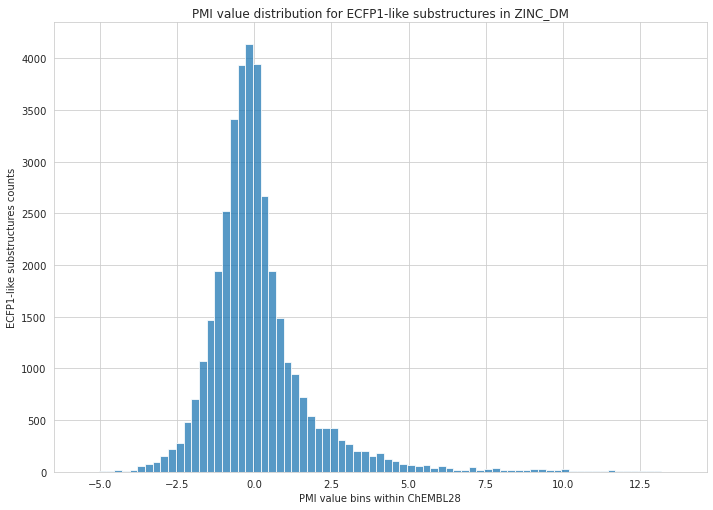

In [ ]:
title = f"PMI value distribution for {FEATURES_NAME} in {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(r.select_raw_interrelations()['value'], binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

## Comparing profiles using Pointwise KL Divergence

In [2]:
q = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
r = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(q)
r.df

value
feature1 feature2          
0        0         0.002148
         1         0.000417
         10        0.000016
         1000      0.000011
         1001      0.000008
...                     ...
997      998       0.000042
         999       0.000116
998      998       0.007356
         999       0.000166
999      999       0.011804

[2077720 rows x 1 columns]

In [3]:
s = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
s.df
t = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(s)
t.df

value
feature1 feature2          
0        0         0.008869
         1         0.003026
         10        0.000396
         100       0.000132
         1000      0.000119
...                     ...
997      998       0.000018
         999       0.000047
998      998       0.008304
         999       0.000249
999      999       0.018574

[2096060 rows x 1 columns]

In [4]:
k = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(t,r)
k.df

value
feature1 feature2          
0        0         2.045958
         1         2.859812
         10        4.644958
         100       5.644962
         1000      3.496095
...                     ...
928      972      -0.027471
939      986      -1.027471
959      995      -0.027471
968      990      -3.834826
969      995      -0.027471

[2098061 rows x 1 columns]

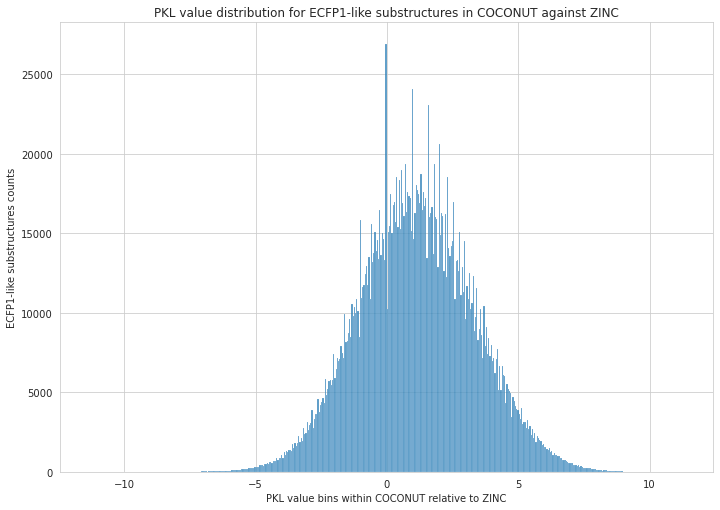

In [7]:
title = f"PKL value distribution for {FEATURES_NAME} in {DATASET_NAME} against ZINC"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(k.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PKL value bins within {DATASET_NAME} relative to ZINC",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=False)[:100])

value
feature1 feature2           
1660     418       11.278595
1364     1419      10.799876
1474     722       10.725754
         869       10.684204
         610       10.572446
10       1660      10.550906
1360     414       10.529039
677      874       10.518463
1755     874       10.517497
669      904       10.515569
1360     775       10.504889
1361     478       10.478345
478      941       10.439119
414      579       10.415477
1037     1474      10.352994
414      775       10.346486
478      515       10.315723
579      775       10.269449
568      775       10.259091
1373     1690      10.257935
1558     414       10.232280
478      746       10.224015
483      574       10.203154
1474     478       10.172209
644      7         10.157408
10       478       10.139638
347      478       10.134924
416      858       10.112084
16       1841      10.105675
1029     141       10.096654
1289     1660      10.078442
1218     414       10.069252
10       644       10.059996
1502     1881      10.056012
1304     1600      10.049352
1747     416       10.031878
1467     1690      10.026463
1600     7          9.979560
1332     941        9.964055
1296     1557       9.962641
418      443        9.961218
1475     858        9.923089
1540     478        9.913581
1306     1502       9.912112
478      633        9.912112
1381     1772       9.904748
208      418        9.877920
574      904        9.874912
1944     871        9.871890
1656     574        9.870379
1660     292        9.864317
266      669        9.833624
1600     292        9.824282
10       1616       9.818027
1234     190        9.807004
1502     2039       9.789517
35       574        9.786314
39       918        9.786314
1323     1474       9.776664
1841     871        9.773437
579      722        9.770198
1625     576        9.753893
1600     1761       9.740717
1356     1558       9.740304
1698     478        9.734088
1977     418        9.719719
1619     775        9.714337
1767     286        9.712314
166      478        9.708939
521      579        9.693636
1868     858        9.685060
1177     478        9.672973
1650     478        9.671238
1716     478        9.643189
1558     775        9.620891
10       1474       9.603714
1399     627        9.600067
1600     427        9.590919
1723     1829       9.587243
1085     1558       9.581712
1881     574        9.576159
1381     1944       9.572446
1944     574        9.568723
628      775        9.563120
478      918        9.552320
1072     479        9.546180
1205     418        9.545233
1478     2007       9.534779
1073     443        9.530958
1399     2002       9.529997
1767     946        9.529039
1073     1600       9.528081
416      478        9.515565
1588     1600       9.500010
1073     1478       9.498054
1037     418        9.486918
478      731        9.486264
418      722        9.465888
198      443        9.464386
276      644        9.460373

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=True)[:100])

,,value
feature1,feature2,
1268,660,-11.316913
1321,660,-9.916971
1684,268,-9.579496
661,796,-9.154171
1001,1579,-9.088163
1190,761,-8.857982
1268,1793,-8.840790
1190,1684,-8.831598
1684,1861,-8.828906


## Comparing profiles using Pointwise Jeffreys Divergence

In [10]:
j = profiles.PointwiseJeffreysDivergenceProfile.from_cooccurrence_probability_profiles(t,r)
j.df

value
feature1 feature2           
0        0          4.091915
         1          5.719623
         10         9.289917
         100       11.289924
         1000       6.992190
...                      ...
928      972        0.054941
939      986        2.054941
959      995        0.054941
968      990        7.669651
969      995        0.054941

[2098061 rows x 1 columns]

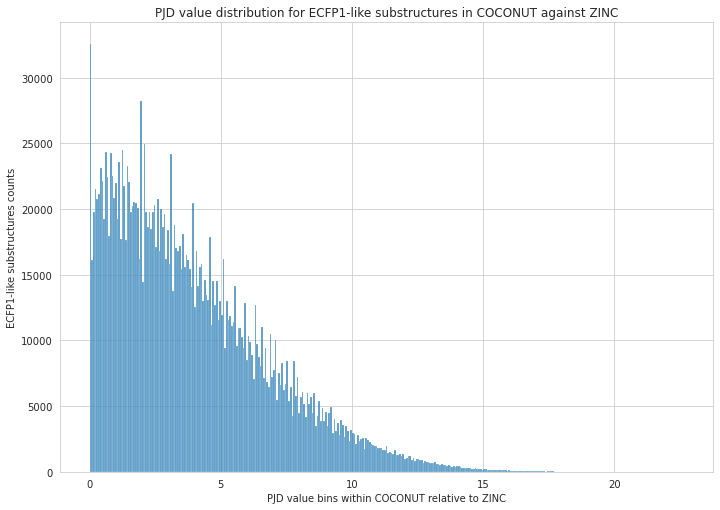

In [11]:
title = f"PJD value distribution for {FEATURES_NAME} in {DATASET_NAME} against ZINC"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(j.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PJD value bins within {DATASET_NAME} relative to ZINC",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=False)[:100])

value
feature1 feature2           
1268     660       22.633827
1660     418       22.557189
1364     1419      21.599752
1474     722       21.451507
         869       21.368408
         610       21.144892
10       1660      21.101811
1360     414       21.058078
677      874       21.036926
1755     874       21.034995
669      904       21.031137
1360     775       21.009778
1361     478       20.956689
478      941       20.878239
414      579       20.830953
1037     1474      20.705988
414      775       20.692971
478      515       20.631445
579      775       20.538899
568      775       20.518182
1373     1690      20.515871
1558     414       20.464560
478      746       20.448031
483      574       20.406308
1474     478       20.344418
644      7         20.314817
10       478       20.279275
347      478       20.269849
416      858       20.224169
16       1841      20.211351
1029     141       20.193309
1289     1660      20.156883
1218     414       20.138504
10       644       20.119992
1502     1881      20.112025
1304     1600      20.098705
1747     416       20.063755
1467     1690      20.052925
1600     7         19.959121
1332     941       19.928110
1296     1557      19.925282
418      443       19.922435
1475     858       19.846178
1321     660       19.833942
1540     478       19.827161
1306     1502      19.824225
478      633       19.824225
1381     1772      19.809496
208      418       19.755840
574      904       19.749824
1944     871       19.743780
1656     574       19.740757
1660     292       19.728634
266      669       19.667248
1600     292       19.648564
10       1616      19.636054
1234     190       19.614008
1502     2039      19.579033
35       574       19.572628
39       918       19.572628
1323     1474      19.553328
1841     871       19.546874
579      722       19.540397
1625     576       19.507786
1600     1761      19.481435
1356     1558      19.480607
1698     478       19.468176
1977     418       19.439438
1619     775       19.428674
1767     286       19.424627
166      478       19.417878
521      579       19.387272
1868     858       19.370120
1177     478       19.345946
1650     478       19.342475
1716     478       19.286379
1558     775       19.241781
10       1474      19.207428
1399     627       19.200134
1600     427       19.181837
1723     1829      19.174486
1085     1558      19.163424
1684     268       19.158991
1881     574       19.152319
1381     1944      19.144892
1944     574       19.137446
628      775       19.126240
478      918       19.104641
1072     479       19.092360
1205     418       19.090467
1478     2007      19.069559
1073     443       19.061915
1399     2002      19.059994
1767     946       19.058078
1073     1600      19.056162
416      478       19.031130
1588     1600      19.000020
1073     1478      18.996108
1037     418       18.973837
478      731       18.972529

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=True)[:100])

,,value
feature1,feature2,
1208,283,0.000020
1670,1808,0.000028
1009,1962,0.000028
1255,8,0.000028
2028,652,0.000028
1499,90,0.000028
1802,184,0.000028
1089,329,0.000028
1208,616,0.000028
